<a href="https://colab.research.google.com/github/mbz8dg/DS-2002-002/blob/main/midterm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/DS3001/group9

Cloning into 'group9'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 136 (delta 70), reused 9 (delta 1), pack-reused 3
Receiving objects: 100% (136/136), 110.13 MiB | 23.27 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Updating files: 100% (11/11), done.


#Summary

Our group aims to explore the impacts of the backgrounds of voters, specifically in terms of their income, age, and racial opinions on their voting preferences from the GSS data. Our specific research question states: how have voter preferences changed over the period of 1980 - 1984 in relation to one’s opinions on race? The period 1980 - 1984 holds is when Ronald Reagan first came into office, resulting in important changes in the economy, foreign policy, social values, and more (https://www.britannica.com/eventUnited-States-presidential-election-of-1980). His presidency involved highly conservative values, leading to a eight year presence of the Republican Party in office. This was a large shift from Carter's previous Democratic presence. All this is said to demonstrate the important developments which contain interesting investigations into how certain variables interact with one another, and possibly display trends over the period of these two elections. With the advantage of a longitudinal study, we are able to examine changes in voter preferences based on any possible developments in their opinions on race, based off of their age and income. We theorize that there will be definite clusters shown in the data - for example, a supgroup of respondents that are in the higher income bracket voted for Reagan and agreed to an all white neighborhood. Our method includes creating various models to predict the voting preferences based on these metrics (i.e. - income and age), cluster analysis, cross-tabulations for specific variables, as well as regressions. For the two elections, we first cleaned the data accordingly and examined the overall data trends through histograms and/or cross-tabulations, and then completed the modeling. We used KKN analysis, followed with computing the SSE for our prediction models to examine the accuracy of them. Additionally, we used scatterplots to compare the voter preferences with the "raceseg" variable as well as income and age to see if there is an overall difference or change for each election, or even across elections. Overall, our results displayed clear trends in certain ages and incomes with their voting preferences, as well as their responses to opinions on race. Voters for Reagan tended to agree more often with a white race-segregated neighborhood throughout both elections. Those who voted for the Democratic candidates were more likely to disagree to a race-segregated neighborhood, although the predicton variables for the '84 election were weaker for Mondale, Reagan's opposing candidate. The overall push for Reagan's voting insisted on an increased prevalance of conservative values between 1980-1984, and an possible increase, or maintained prejudiced opinions for those who favored Reagan. The models displayed confidence between within certain age groups and incomes for each of the figures we used, proving that they were a decent fit to come to these conclusions.

#Data

##Finding Relevant Data
We began our project with general interest in voting preferences. We explored race, sex, college degree, and income variables with the intention to find correlations with voting preferences in particular elections. We were initially most interested in the 2016 election because of its recency and cultural significance. Surprisingly, we found the data surrounding the election relatively messy and poor. We were faced with our first major decision: would it be better to focus on a more relevant election with poorer data or focus on an older election with more accurate data? We decided to focus on the latter, specifically analyzing how demographics affected voter preferences in the elections of 1980 and 1984. Though the 2016 election was initially more interesting to us, we decided that it would be best to make our conclusions based on the most sound data available.

##1980 Election
We made a few key decisions in our data cleaning for the 1980 presidential election. We turned the ‘pres80’ variable (asking respondents who they voted for in the 1980 election) into a binary variable, removing responses indicating votes for other candidates or not voting at all. We wanted to only focus on votes for Reagan and Carter. For the income variables, we replaced each income range with the mean as its numeric value. Replacing each income range with its mean value eliminated some income variation but improved the understandability of our analysis. These decisions were challenging. In our effort to clean the data and make strong predictions, we had to sacrifice some relevant data. For example, John B. Anderson ran in the 1980 election and was included in the original dataset. Anderson campaigned for cutting social security taxes, which may have had a strong correlation to income. Our need for a binary prediction variable forced us to exclude Anderson from our regressions. After other minor data cleaning (including removing null values and coercing the age variable to numeric), we preprocessed the data for kNN, max-min normalized the data, trained, fit, and ran the model. We determined an optimal k value of 63 to minimize SSE. Our specific steps to determine this k value are discussed in the 'Results' section. Our first regression model was general: how did distribution of voters for Reagan and Carter vary based on income and age? We found a fairly strong predictive relationship but also were interested in exploring something more specific. For that reason, we modeled the 1980 election by the ‘racseg’ variable.

##1980 Election by 'racseg'
‘Racseg’ asked respondents whether they believed whites should have a right to segregate neighborhoods. We found 'racseg' variable interesting because it snapshots racist attitudes in 1980 in the context of a broader cultural trend away from racism following the civil rights movement. The 'raceseg' variable posed another interesting data cleaning challenge. The survey question allowed respondents four responses: "agree strongly," "agree slightly," "disagree slightly," and "disagree strongly." We chose to convert all responses to either "agree" or "disagree" for sake of simplicity in our models. We then split the data into two data frames: one dataframe with respondents that believed whites had the right to segregate neighborhoods (agree), and one that believed whites did not have the right to segregate neighborhoods (disagree). We created scatterplots and crosstabbed these analyses to find relationships between our variables. These analyses clearly demonstrated distinct distributions of voting patterns based on age and income when observations were sub-divided by ‘racseg.’ We found clear predictions when running a kNN regression for both data frames. These will be discussed further in the 'Results' section.

##1984 Election
Our cleaning, regression, and visualization procedures for the 1984 election were largely similar to our procedures for the 1980 election. We converted ‘pres84’ into a binary variable (as we were only concerned with votes for Reagan or Mondale) and replaced each income range with the mean of its numeric value. We then coerced the age variable into numeric values. We found an optimal k value of 65, slightly higher than the k value for the 1980 election. Our regression depicted the distribution of voters for Reagan and Mondale based on income and age-- directly comparable to our regression for the 1980 election. The cultural context and results of this election were very different from the 1980 election and affected our regression accordingly. We employed different visualization techniques to interpret the 1984 election, which will be further discussed in the 'Results' section.

##1984 Election by 'racseg'
We followed the same procedures when modeling the 1984 election by 'racseg' as we did when modeling the 1980 election by 'racseg.' We ensured each data frame was only filled with 'agree' or 'disagree' data, crosstabbed and created scatterplots for the data, and used a kNN regression for each data frame. The 'racseg' variable had far less "do not know/can not choose" responses compared to 1980, likely indicating that respondents felt more strongly about the question. Less missing values in the 'racseg' variable also allowed us to make stronger predictions.

#Results

# Import dependencies and load data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import zipfile # for reading csv as zip

In [ ]:
# zip file in git repo
zip_path = "./group9/gss.csv.zip"

# Desired csv file in zip
file_to_read = "gss.csv"

with zipfile.ZipFile(zip_path, 'r') as zip_file:

  var_list = ['racseg', 'pres80', 'degree', 'age', 'race', 'sex', 'rincom82', 'rincom86', 'pres84'] # List of variables to save
  output_file = 'raw_gss_data.csv' # Name of the file to save the data to

  parser = pd.read_csv(zip_file.open(file_to_read), iterator=True, chunksize=10000, low_memory=False) # Creates a parser for the whole data
  modes = ['w','a'] # Has write mode and append mode
  phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

  for chunk in parser: # For each chunk of the data
      print(chunk.loc[:,var_list].head()) # Visually inspect the first few rows
      chunk.loc[:,var_list].to_csv(output_file, # specifies target file to save the chunk to
                                  mode=modes[phase], # control write versus append
                                  header=var_list, # variable names
                                  index=False) # no row index saved
      phase = 1 # Switch from write mode to append mode




In [ ]:
# Create dataframe from 'raw_gss_data.csv' that was just written
gss_dat = pd.read_csv("raw_gss_data.csv") # '80 election
gss_dat84 = pd.read_csv("raw_gss_data.csv") # '84 election


# Data cleaning and preprocessing ('80 election)

In [ ]:
gss_dat['pres80'].unique()

In [ ]:
#print(gss_dat['pres80'].value_counts())

# Remove "didn't vote for president" and other no answer responses (see codebook), also deleted Anderson as we want binary prediction variable
gss_dat = gss_dat.loc[
    (gss_dat['pres80'] == 'reagan') |
    (gss_dat['pres80'] == 'carter'), :]

# Every entry either voted for Trump, Clinton, or other unspecified candidate
print(gss_dat['pres80'].value_counts())
print(gss_dat['pres80'].isnull().sum())


# data is now filtered for years 82-87, as observations for pres80 are only in this range

In [ ]:
gss_dat['degree'].isnull().sum()
gss_dat['degree'].value_counts()
gss_dat['degree'].unique() # NaN and 'degree' present

gss_dat = gss_dat.loc[(~gss_dat['degree'].isnull()) & (gss_dat['degree'] != 'degree'), ] # keep rows where value for degree is not NaN or 'degree' (see codebook, NaN and 'degree' respones are invalid)
gss_dat['degree'].unique() # all observations are now "bachelor's", 'less than high school', 'high school', 'graduate', or 'associate/junior college'

gss_dat['degree'].hist()
plt.xticks(rotation=90)

In [ ]:
# rincom82
# because of the distribution of this histogram, I think it is ok to take the mean of each range as its numeric value
## $50,000 + is ok as 50000 as it is not a huge proportion of the data
#gss_dat['rincom82'].hist()
gss_dat['rincom82'].unique()

gss_dat['rincom82'].value_counts()
# recode all values to numeric mean of range
temp = gss_dat['rincom82'].replace('lt $1000', 1000).replace('$1000-2999', 2000).replace('$3000-3999', 3500).replace('$4000-4999', 4500).replace('$5000-5999', 5500).replace('$6000-6999', 6500).replace('$7000-7999', 7500).replace('$8000-9999', 9000).replace('$10000-12499', 11250).replace('$12500-14999', 13750).replace('$15000-17499', 16250).replace('$17500-19999', 18750).replace('$20000-22499', 21250).replace('$22500-24999', 23750).replace('$25000-34999', 30000).replace('$35000-49999', 42500).replace('$50000 +', 50000)
temp.value_counts()
gss_dat['rincom82'] = temp



# rincom86
gss_dat['rincom86'].value_counts()
# recode all values to numeric mean of range
temp = gss_dat['rincom86'].replace('lt $1000', 1000).replace('$1000-2999', 2000).replace('$3000-3999', 3500).replace('$4000-4999', 4500).replace('$5000-5999', 5500).replace('$6000-6999', 6500).replace('$7000-7999', 7500).replace('$8000-9999', 9000).replace('$10000-12499', 11250).replace('$12500-14999', 13750).replace('$15000-17499', 16250).replace('$17500-19999', 18750).replace('$20000-22499', 21250).replace('$22500-24999', 23750).replace('$25000-29999', 27500).replace('$30000-34999', 32500).replace('$35000-39999', 37500).replace('$40000-49999', 45000).replace('$50000-59999', 55000).replace('$60000+', 60000)
temp.value_counts()
gss_dat['rincom86'] = temp

gss_dat = gss_dat.loc[(~gss_dat['rincom82'].isnull()) |
                      (~gss_dat['rincom86'].isnull()), ] # dropped all rows where rincom82 is a NaN or rincom86 is a NaN


print(gss_dat['rincom82'].unique())
print(gss_dat['rincom86'].unique())

# Combine data
gss_dat['income'] = gss_dat['rincom82'].fillna(gss_dat['rincom86']) # make a combined column 'income' that is equal to rincom82 unless it is NaN, then equal to rincom86




[18750. 16250. 11250.  2000. 30000.  1000.  6500.  4500.  3500. 21250.
 23750.  7500. 13750.  5500. 50000.  9000. 42500.    nan]
[   nan 60000. 11250. 27500. 21250. 23750. 32500.  7500.  5500.  3500.
  1000. 55000.  4500. 37500. 13750. 16250.  2000.  9000. 18750. 45000.
  6500.]


<ipython-input-8-430a7039cede>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat['income'] = gss_dat['rincom82'].fillna(gss_dat['rincom86']) # make a combined column 'income' that is equal to rincom82 unless it is NaN, then equal to rincom86




**Data preprocessing for kNN**

In [ ]:
# Coerce age to numeric
print(gss_dat['age'].value_counts())
gss_dat['age'].isnull().sum()
gss_dat = gss_dat.loc[~gss_dat['age'].isnull(), ] # keep rows where age is NOT null
gss_dat['age'].isnull().sum()

gss_dat['age'] = pd.to_numeric(gss_dat['age'], errors="coerce")

In [ ]:
gss_dat['degree'] = gss_dat['degree'].replace('less than high school', 0).replace('high school', 1).replace('associate/junior college', 2).replace("bachelor's", 3).replace('graduate', 4)
# 0 = Less than hs
# 1 = hs
# 2 = associate/junior college
# 3 = bachelors
# 4 = graduate


In [ ]:
gss_dat['pres80'] = gss_dat['pres80'].replace('reagan', 1).replace('carter', 0)

In [ ]:
gss_dat['sex'] = gss_dat['sex'].replace('female', 0).replace('male', 1)

# Modeling ('80 election)

In [ ]:
# Function to max-min normalize data so each variables ranges from 0-1
def maxmin(x):
  res = (x-min(x))/(max(x)-min(x))
  return res

In [ ]:
print(min(gss_dat['age'].unique()))
print(max(gss_dat['age'].unique()))
print(min(gss_dat['income'].unique()))
print(max(gss_dat['income'].unique()))

from sklearn.model_selection import train_test_split

# Maxmin normalize data and split into training/testing sets
X = gss_dat[['income', 'age']]
y = gss_dat['pres80']


X = X.apply(maxmin)
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=74)
print("X_train data:", X_train.shape)
print("X_test data:", X_test.shape)
print("y_train data:", y_train.shape)
print("y_test data:", y_test.shape)

print(X_train.columns)
print(X_test.columns)

In [ ]:
# Fit model
from sklearn.neighbors import KNeighborsRegressor as kNNRegressor

knn_model = kNNRegressor(n_neighbors=63)
fitted_model = knn_model.fit(X_train, y_train)


In [ ]:
# Run regression model
# Regression function to predict pres vote based on 'age' and 'income'
def plot_regression(X_train, y_train, num_colors):

  N_x = 100
  N_y = 100 # Coarseness of y variable
  total = N_x*N_y # Total number of points to plot

  grid_x = np.linspace(0,1,N_x) # Create a grid of x values
  grid_y = np.linspace(0,1,N_y) # Create a grid of y values

  xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
  X = xs.reshape(total) # Turns pairs into vectors
  Y = ys.reshape(total) # Turns pairs into vectors

  x_hat = pd.DataFrame({'income':X,'age':Y}) # Create a dataframe of points to plot
  y_hat = fitted_model.predict(x_hat) # Fit the model to the points
  x_hat['Predicted'] = y_hat # Add new variable to the dataframe

  # Red to blue palette to show traditional political colors
  red_to_blue_palette = sns.color_palette("RdBu_r", n_colors=num_colors) # n_colors determined by k

  this_plot = sns.scatterplot(data=x_hat,x='age',y='income',hue='Predicted', palette= red_to_blue_palette) # Create seaborn plot

  # Round legend values to 2 decimal
  legend = plt.legend() # stackoverflow.com
  for text in legend.get_texts():
    original_label = text.get_text()
    rounded_label = str(round(float(original_label), 2))
    text.set_text(rounded_label)

  sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas
  plt.title("Distribution of voters for Reagan and Carter ('80) based on Income and Age")
  plt.ylabel('Income')
  plt.xlabel('Age')

  plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [20, 33, 46, 59, 72, 85])
  plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [1000, 13000, 25000, 37000, 49000, 60000])

  ### to-do ###
  # convert axis ticks back to original data for understandability

  return x_hat

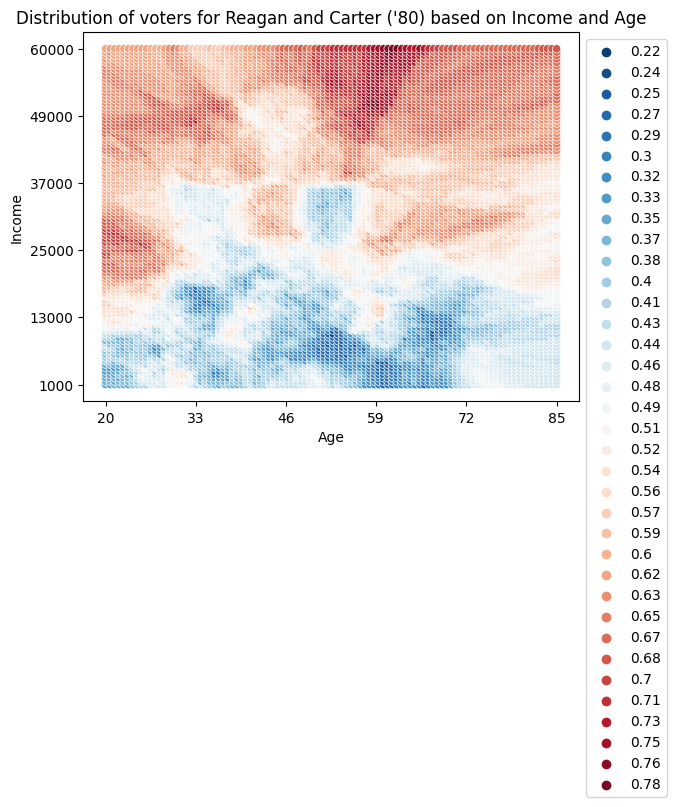

In [ ]:
train_dat = plot_regression(X_train, y_train, 36)

## NOTE: the range of values for prediction gives some insight. The lowest and highest predictions are .22 away from the definitive 0 or 1. The darkest red is ~80% likely to have voted for Reagan.

**Figure 1 - Distribution of voters for Reagan and Carter ('80) based on Income and Age**

In [ ]:
# Determine k value
# Determine optimal k val for this data

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("K where SSE is minimized:", k_star)
print("SSE at " + str(k_star) + ':', SSE_min)

K where SSE is minimized: [63]
SSE at [63]: 146.60367850844042


Text(0, 0.5, 'SSE')

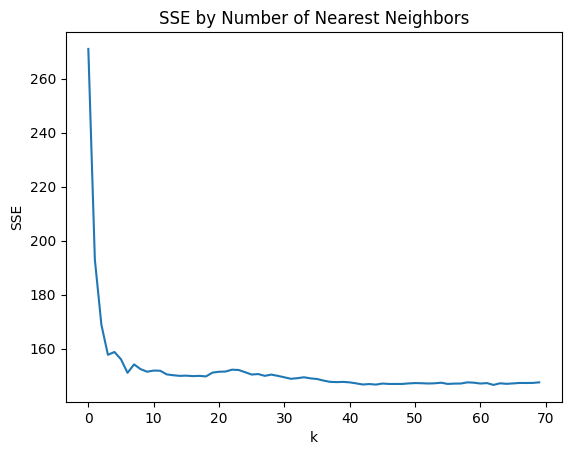

In [ ]:
plt.title("SSE by Number of Nearest Neighbors")
plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")

###Modeling '80 election
To model the 1980 election K nearest neighbor regression was implemented in order to plot the predicted voting patterns of individual Age, Income voter combinations. Utilizing a 80/20 train-test split a k value of 63 was determined to minimize SSE. The graph SSE by Number of Nearest Neighbors shows the minimization process. After the initial rapid descent from k=0 to k=5 SSE begins to approach a horizontal asymptote at approximately SSE=145. Therefore it is important to consider an overfitting problem when determining the SSE k value tradeoff. In this situation it is likely that for greater k SSE will decrease on the margin. This being said for each additional k the model risks overfitting and losing value. An overfit model can decrease SSE while losing predictive power by applying trends that may not exist but for near negligible nuances found in the data. In this case the model would be far from predicting tangible and actionable real-world trends. For this reason k was minimized in the range of (0,70) such that SSE would approach the asymptote without suffering overfitting. This is how k=63 came to be used as the SSE minimizing k value.

The model was fit using the training data then applied to a 100x100 scatter plot colored by prediction coefficient. The plot maps Age from 20 to 85 on the x-axis and max-min normalized Income data on the y-axis. The model works such that a coefficient of zero will be coded in dark Blue, and represent a sure vote for Carter (Democrat). On the other hand a coefficient of 1 will represent a sure vote for Reagan (Republican) and colored dark red. Figure 1 - Distribution of voters for Reagan and Carter (‘80) based on Income and Age

The training data shows that the regression finds a clear relationship between income and voting result. A quasilinear horizontal segmentation can be seen separating blue and red results at approximately 25,000 dollars of income. Notably this 40th percentile segmentation is weak on the extremes of age, most notably seen in the age of 20-33 where young people even down to the 20th percentile are predicted to vote for Reagan (red). When considering age the trend is seen not in red vs. blue but rather in the strength of the correlation. The deepest colors (strongest prediction coefficient) are seen within the 50-60 age range with both ends of age showing weaker coefficients. Further dissecting this trend it is clear that the deepest colors are at the extremes of income. It is clear that the most solidified voting blocs are thus the upper and lower 20% of income for 50-60 year old Americans. It is these two groups that this model most confidently predicts for the election of 1980. It is important to note however that the model never allows for a prediction coefficient closer than .22 away from 0 or 1. This suggests that even the most confident regions still leave room for ambiguity.

Beyond these major trends the model also identifies several unique trends within the plot. One trend of note is the alternating pattern shown in the 25,000-37000 dollars of income for Americans below the age of 60. The trend shows that for the youngest voters in this age income bracket the model predicts a trend towards a vote for Reagan. Then for Americans approximately 30-40 a general vote for Carter is predicted. This trend continues with the model predicting age 40-50 and 50-56 voting for Reagan and Carter respectively. In the end middle income Americans are predicted to vote for Reagan as they move past the age of 60.

Overall under this model income is shown to be a strong predictor, specifically for the upper and lower 20%. Age shows a trend in prediction coefficient, with those age 50-60 most strongly predicted by the model for their respective candidate. This information is very interesting and speak to not just historical trends, but can also be applied and compared to modern elections to understand specifically how income is influential in voter decisions.



# Modeling by 'racseg' ('80 election)

In [ ]:
# Clean data to only incorporate observations with 'racseg' values'
gss_dat = gss_dat.loc[~gss_dat['racseg'].isnull()]
gss_dat['racseg'].unique()

# combine variations of same answer into agree and disagree (1-0)
gss_dat['racseg'] = gss_dat['racseg'].replace("agree slightly", 1).replace("agree strongly", 1).replace("disagree slightly", 0).replace("disagree strongly", 0)

agree_dat = gss_dat.loc[gss_dat['racseg'] == 1]
disagree_dat = gss_dat.loc[gss_dat['racseg'] == 0]

# each dataframe contains either only agree or disagree data
print(agree_dat['racseg'].unique())
print(disagree_dat['racseg'].unique())

<Axes: xlabel='age', ylabel='income'>

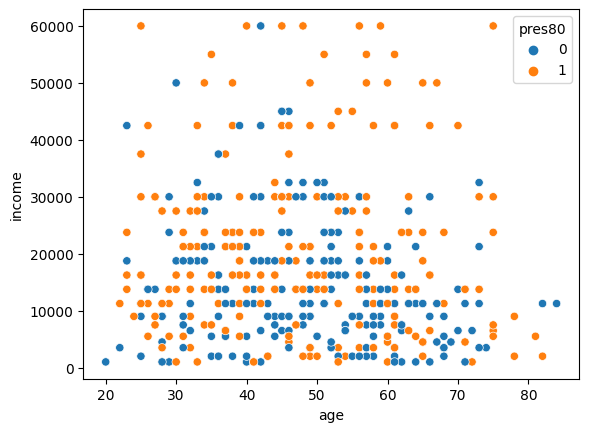

In [ ]:
# those who AGREE that "whites have a right to a segregated neighborhood"
sns.scatterplot(data=agree_dat, x='age', y='income', hue='pres80')

<Axes: xlabel='age', ylabel='income'>

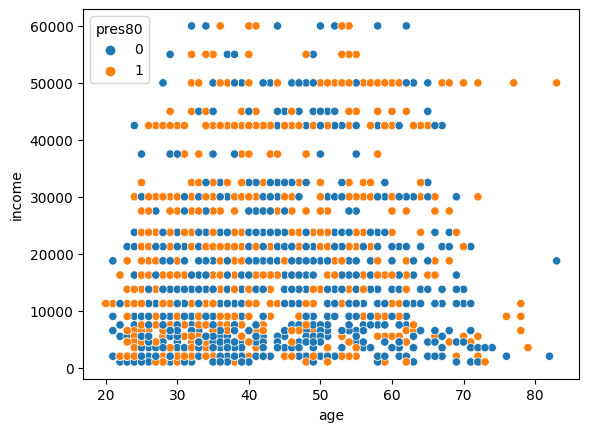

In [ ]:
# those who DISAGREE that "whites have a right to a segregated neighborhood"
sns.scatterplot(data=disagree_dat, x='age', y='income', hue='pres80')

It is clear with these scatterplots that there is a different distribution of voting patterns based on age and income when observations are sub-divided by 'racseg'. Let's run kNN regression for election; once for those who agree, once for those who disagree, and we will see if our regression models become any clearer

<Axes: xlabel='temp_age', ylabel='temp_income'>

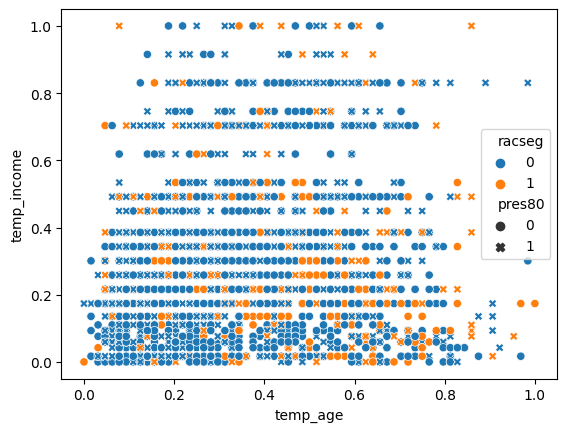

In [ ]:
temp = gss_dat[['age']]
temp_age = temp.apply(maxmin)
temp = gss_dat[['income']]
temp_income = temp.apply(maxmin)

gss_dat['temp_age'] = temp_age
gss_dat['temp_income'] = temp_income

sns.scatterplot(data=gss_dat, x='temp_age', y='temp_income', hue='racseg', style='pres80')

In [ ]:
### kNN for those who AGREE ('racseg') ###
X = agree_dat[['income', 'age']]
y = agree_dat['pres80']

X = X.apply(maxmin)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=72)


model = kNNRegressor(n_neighbors=45) # from SSE vs. k graphed below
fitted_model = model.fit(X_train, y_train)

([<matplotlib.axis.YTick at 0x79b6a486b4f0>,
 [Text(0, 0.0, '1000'),
  Text(0, 0.2, '13000'),
  Text(0, 0.4, '25000'),
  Text(0, 0.6, '37000'),
  Text(0, 0.8, '49000'),
  Text(0, 1.0, '60000')])

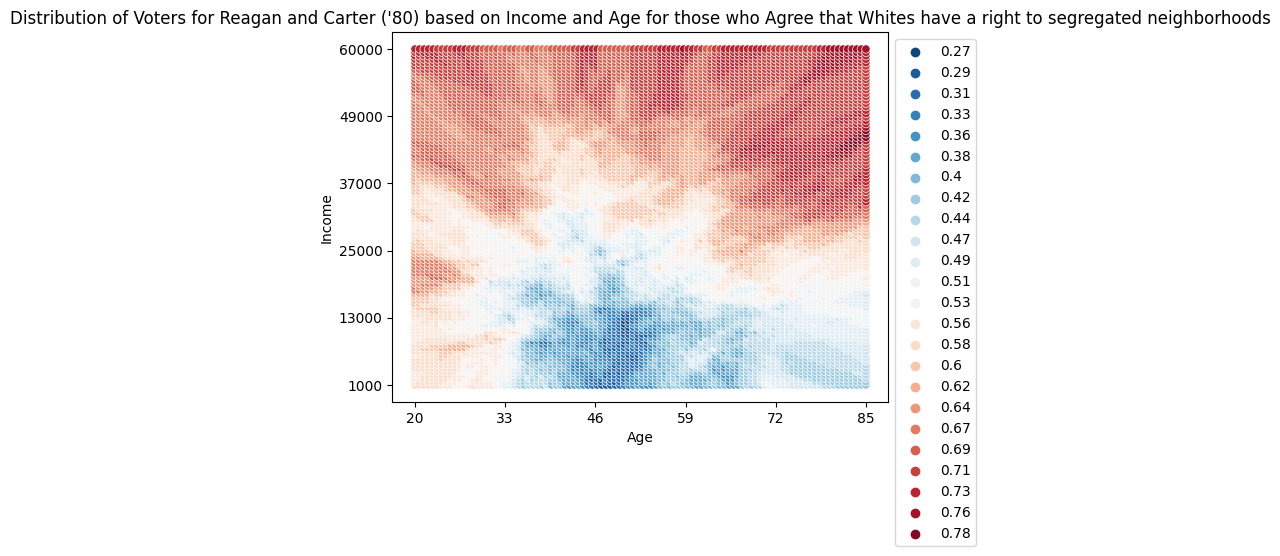

In [ ]:
plot_regression(X_train, y_train, num_colors=24)
plt.title("Distribution of Voters for Reagan and Carter ('80) based on Income and Age for those who Agree that Whites have a right to segregated neighborhoods")
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [1000, 13000, 25000, 37000, 49000, 60000])

**Figure 2 - Distribution of of Voters for those that agree that Whites have a right to segregated neighborhoods ('80 election)**



In [ ]:
# Determine k value
# Determine optimal k val for this data

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("K where SSE is minimized:", k_star)
print("SSE at " + str(k_star) + ':', SSE_min)

K where SSE is minimized: [45]
SSE at [45]: 22.75802469135802


Text(0, 0.5, 'SSE')

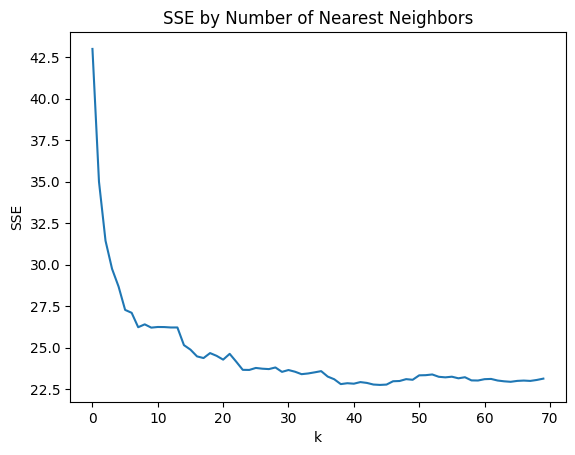

In [ ]:
plt.title("SSE by Number of Nearest Neighbors")
plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")

After modeling the 1980 election based on age and income, we decided to run a more specific model including the ‘racseg’ variable to understand correlations between a person’s voting habits and racially prejudiced tendencies. We created two dataframes, one with individuals that agree to the question regarding whether white people should have segregated neighborhoods and those that disagree. A k nearest neighbor regression predicts the voting patterns of individuals based on age and income for those who agreed with the question. Utilizing a 80/20 train-test split a k value of 45 was determined to minimize SSE.

The distribution is represented through a similar prediction scatterplot mentioned above, where blue and red represent Carter or Reagan votes with the strength of the correlation listed from 0 to 1 with 0 being a sure Carter vote in dark blue and 1 being a sure Reagan vote in dark red. Looking at Figure 2, one notable trend is stronger prediction coefficients with respect to higher income individuals. For high income individuals, compared to Figure 1, there are stronger prediction coefficients with respect to Reagan votes (the upper-half portion of the distribution is a darker red). The model demonstrated that individuals that agree with the idea of segregating neighborhoods tend to vote more for Reagan when their income is above $25,000. Another difference between Figure 1 and 2 is the alternating voting preferences between 25,000-37,000 individuals. Figure 2 does not clearly display the changes in voting preferences between Carter and Reagan for middle-aged individuals. These voters tend to vote less for Carter, as prediction coefficients remain more neutral around 0.5. Similarly, for young voters between 20-33, there are very few prediction coefficients that favor Carter (< 0.5). The bottom left of Figure 2 remains slightly red, while it is dominantly blue in Figure 1.

In [ ]:
### kNN for those who DISAGREE ('racseg') ###
X = disagree_dat[['income', 'age']]
y = disagree_dat['pres80']

X = X.apply(maxmin)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=72)


model = kNNRegressor(n_neighbors=60)
fitted_model = model.fit(X_train, y_train)

Text(0.5, 1.0, "Distribution of Voters for Reagan and Carter ('80) based on Income and Age for those who Disagree that Whites have a right to segregated neighborhoods")

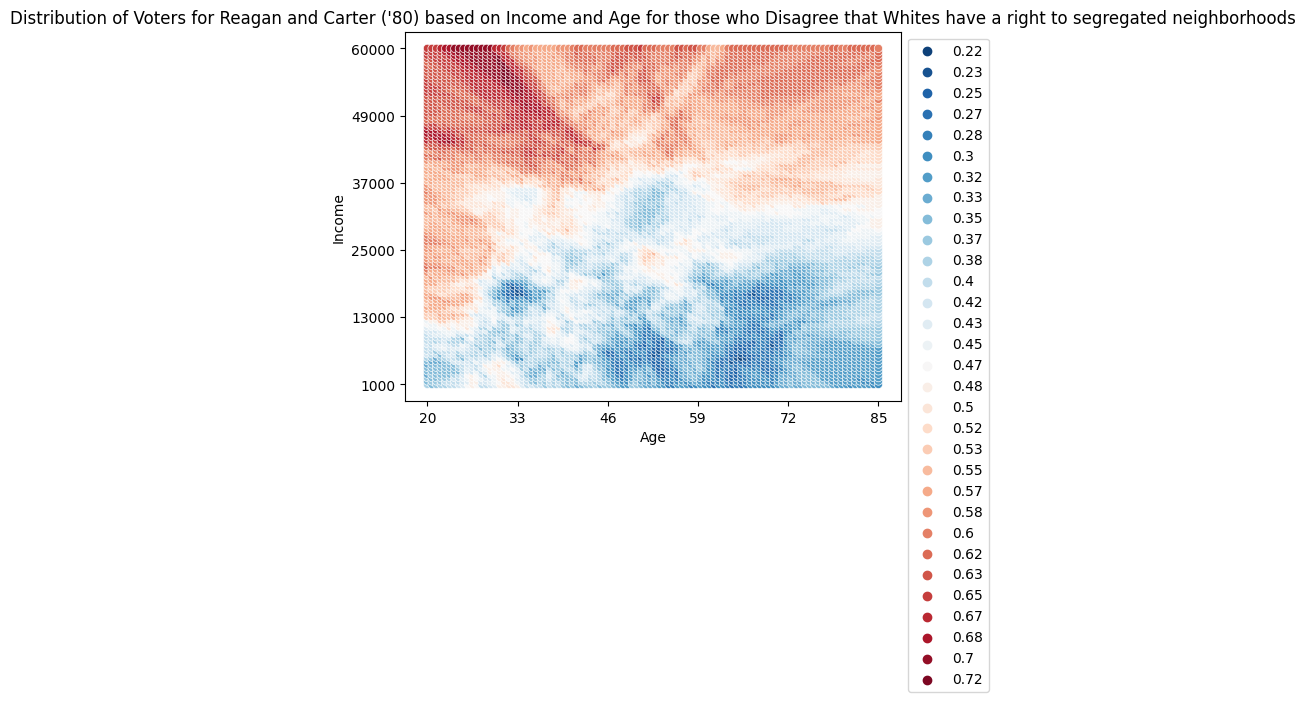

In [ ]:
plot_regression(X_train, y_train, num_colors=31)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [1000, 13000, 25000, 37000, 49000, 60000])
plt.title("Distribution of Voters for Reagan and Carter ('80) based on Income and Age for those who Disagree that Whites have a right to segregated neighborhoods")

**Figure 3 - Distribution of of Voters for those that disagree that Whites have a right to segregated neighborhoods ('80 election)**



In [ ]:
# Determine k value
# Determine optimal k val for this data

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("K where SSE is minimized:", k_star)
print("SSE at " + str(k_star) + ':', SSE_min)

K where SSE is minimized: [60]
SSE at [60]: 92.83166666666668


Text(0, 0.5, 'SSE')

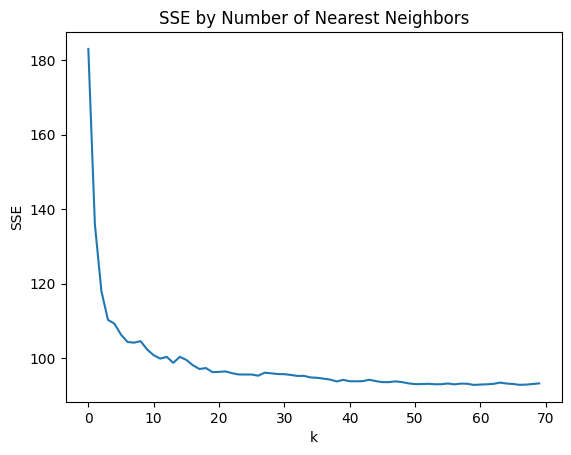

In [ ]:
plt.title("SSE by Number of Nearest Neighbors")
plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")

Looking at the Knn regression for those that disagreed with the question (represented in Figure 3), voting trends favored Carter more in general compared to Figure 1 and 2; however, income was still a strong predictor in voting preferences. It is important to note that for the distribution in Figure 3, a white prediction coefficient does not represent a 0.5 voting preference, meaning there is more orange on the scatterplot than intended. White areas can be interpreted as very light blue, favoring Carter more than Reagan.

In [ ]:
pd.crosstab(gss_dat['racseg'], gss_dat['pres80'])

pres80,0,1
racseg,,
0,1099,843
1,228,236


**Figure 4 - Crosstab between "pres80" and "racseg"**

Overall, splitting the data set using the variable ‘racseg’ continued to provide strong evidence regarding income as a predictor of voting preferences but also identified unique insights between voters and their segregation philosophy. Those that agree with segregating neighborhoods based on race were predicted to vote more for Reagan in instances where the initial Figure 1 showed colors of blue or white. In contrast, those that disagree had stronger prediction coefficients in favor of Carter. From these findings, we can conclude that during the 1980 election, individuals characterized as “non-racists” tended to vote more for the Democratic Party. Figure 4 helps display this representation, as 56.6% or 1099/1942 voted for Carter. It would be interesting to go further into this variable with more recent elections to better understand how consistent ‘Racseg’ is in predicting voting preferences for the same individuals. It is important to note one potential source of bias with respect to the subdivision of the original data frame. ‘racseg’ was cleaned where the response “agreed slightly” and “disagree slightly” were combined with the “agreed strongly” and “disagree strongly.”

# Data cleaning and preprocessing ('84 election)

In [ ]:
gss_dat84['pres84'].unique()

# Remove "didn't vote for president" and other no answer responses (see codebook), binary prediction variable
gss_dat84 = gss_dat84.loc[
    (gss_dat84['pres84'] == 'reagan') |
    (gss_dat84['pres84'] == 'mondale'), :]

print(gss_dat84['pres84'].value_counts())
print(gss_dat84['pres84'].isnull().sum())

gss_dat84['pres84'] = gss_dat84['pres84'].replace('mondale', 0).replace('reagan', 1)
print(gss_dat84['pres84'].value_counts())

# data is now filtered for years 85-89, as observations for pres84 are only in this range

<ipython-input-34-7f9816e29fe2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat84['rincom82'] = temp
<ipython-input-34-7f9816e29fe2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat84['rincom86'] = temp


<Axes: >

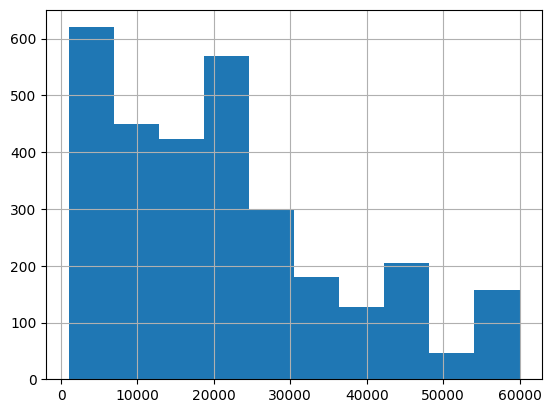

In [ ]:
# rincom82
# because of the distribution of this histogram, I think it is ok to take the mean of each range as its numeric value
## $50,000 + is ok as 50000 as it is not a huge proportion of the data
#gss_dat['rincom82'].hist()

# recode all values to numeric mean of range
temp = gss_dat84['rincom82'].replace('lt $1000', 1000).replace('$1000-2999', 2000).replace('$3000-3999', 3500).replace('$4000-4999', 4500).replace('$5000-5999', 5500).replace('$6000-6999', 6500).replace('$7000-7999', 7500).replace('$8000-9999', 9000).replace('$10000-12499', 11250).replace('$12500-14999', 13750).replace('$15000-17499', 16250).replace('$17500-19999', 18750).replace('$20000-22499', 21250).replace('$22500-24999', 23750).replace('$25000-34999', 30000).replace('$35000-49999', 42500).replace('$50000 +', 50000)
temp.value_counts()
gss_dat84['rincom82'] = temp



# rincom86

# recode all values to numeric mean of range
temp = gss_dat84['rincom86'].replace('lt $1000', 1000).replace('$1000-2999', 2000).replace('$3000-3999', 3500).replace('$4000-4999', 4500).replace('$5000-5999', 5500).replace('$6000-6999', 6500).replace('$7000-7999', 7500).replace('$8000-9999', 9000).replace('$10000-12499', 11250).replace('$12500-14999', 13750).replace('$15000-17499', 16250).replace('$17500-19999', 18750).replace('$20000-22499', 21250).replace('$22500-24999', 23750).replace('$25000-29999', 27500).replace('$30000-34999', 32500).replace('$35000-39999', 37500).replace('$40000-49999', 45000).replace('$50000-59999', 55000).replace('$60000+', 60000)
temp.value_counts()
gss_dat84['rincom86'] = temp

gss_dat84 = gss_dat84.loc[(~gss_dat84['rincom82'].isnull()) |
                      (~gss_dat84['rincom86'].isnull()), ] # dropped all rows where rincom82 is a NaN or rincom86 is a NaN


# Combine data
gss_dat84['income'] = gss_dat84['rincom82'].fillna(gss_dat84['rincom86']) # make a combined column 'income' that is equal to rincom82 unless it is NaN, then equal to rincom86
gss_dat84['income'].describe()



gss_dat84['income'].unique()
gss_dat84['income'].hist()

In [ ]:
pd.crosstab(gss_dat84['income'], gss_dat84['pres84'])

pres84,0,1
income,,
1000.0,42,62
2000.0,60,82
3500.0,58,56
4500.0,39,36
5500.0,42,46
6500.0,46,51
7500.0,42,49
9000.0,59,66
11250.0,91,143


Shows that for all levels of Income Reagan receives the vote. This trend only gets stronger as income increases. We will look for a similar pattern in the prediction data.

In [ ]:
# Coerce age to numeric
print(gss_dat84['age'].value_counts())
gss_dat84['age'].isnull().sum()
gss_dat84 = gss_dat84.loc[~gss_dat84['age'].isnull(), ] # keep rows where age is NOT null
gss_dat84['age'].isnull().sum()

gss_dat84['age'] = pd.to_numeric(gss_dat84['age'], errors="coerce")

In [ ]:
gss_dat84['degree'].isnull().sum()
gss_dat84['degree'].value_counts()
gss_dat84['degree'].unique() # NaN and 'degree' present

gss_dat84 = gss_dat84.loc[(~gss_dat84['degree'].isnull()) & (gss_dat84['degree'] != 'degree'), ] # keep rows where value for degree is not NaN or 'degree' (see codebook, NaN and 'degree' respones are invalid)
gss_dat84['degree'].unique() # all observations are now "bachelor's", 'less than high school', 'high school', 'graduate', or 'associate/junior college'

# Modeling ('84 election)

In [ ]:
# Maxmin normalize data and split into training/testing sets
X = gss_dat84[['income', 'age']]
y = gss_dat84['pres84']


X = X.apply(maxmin)
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=74)
print("X_train data:", X_train.shape)
print("X_test data:", X_test.shape)
print("y_train data:", y_train.shape)
print("y_test data:", y_test.shape)

print(X_train.columns)
print(X_test.columns)

         income       age
17053  0.343220  0.212121
17054  0.830508  0.454545
17055  0.000000  0.060606
17056  0.173729  0.106061
17057  0.216102  0.075758
X_train data: (2460, 2)
X_test data: (615, 2)
y_train data: (2460,)
y_test data: (615,)
Index(['income', 'age'], dtype='object')
Index(['income', 'age'], dtype='object')


In [ ]:
# Fit model
knn_model = kNNRegressor(n_neighbors=65)
fitted_model = knn_model.fit(X_train, y_train)

In [ ]:
# Run regression model
import matplotlib.colors

# Regression function to predict pres vote based on 'age' and 'income'
def plot_regression2(X_train, y_train):

  N_x = 100
  N_y = 100 # Coarseness of y variable
  total = N_x*N_y # Total number of points to plot

  grid_x = np.linspace(0,1,N_x) # Create a grid of x values
  grid_y = np.linspace(0,1,N_y) # Create a grid of y values

  xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
  X = xs.reshape(total) # Turns pairs into vectors
  Y = ys.reshape(total) # Turns pairs into vectors

  x_hat = pd.DataFrame({'income':X,'age':Y}) # Create a dataframe of points to plot
  y_hat = fitted_model.predict(x_hat) # Fit the model to the points
  x_hat['Predicted'] = y_hat # Add new variable to the dataframe


  # Round legend values to 2 decimal
  cdict = {'red':  ((0.0, 0.0, 0.0),
                    (0.5, 1.0, 1.0),
                    (1.0, 1.0, 1.0)),

          'green': ((0,0,0),
                  (0.5,1,1),
                  (1,0,0)),

          'blue': ((0.0, 1.0, 1.0),
                    (0.5, 1.0, 1.0),
                    (1.0, 0.0, 0.0))
          }
  cmap = matplotlib.colors.LinearSegmentedColormap("", cdict)

  #plot
  plt.scatter(x=x_hat["age"],y=x_hat["income"],c=x_hat["Predicted"],cmap=cmap,vmin=0,vmax=1)
  plt.title("Distribution of voters for Reagan and Mondale ('84) based on Income and Age")
  plt.ylabel('Income')
  plt.xlabel('Age')
  plt.colorbar()
  plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [20, 33, 46, 59, 72, 85])
  plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [1000, 13000, 25000, 37000, 49000, 60000])
  plt.show()


  return x_hat

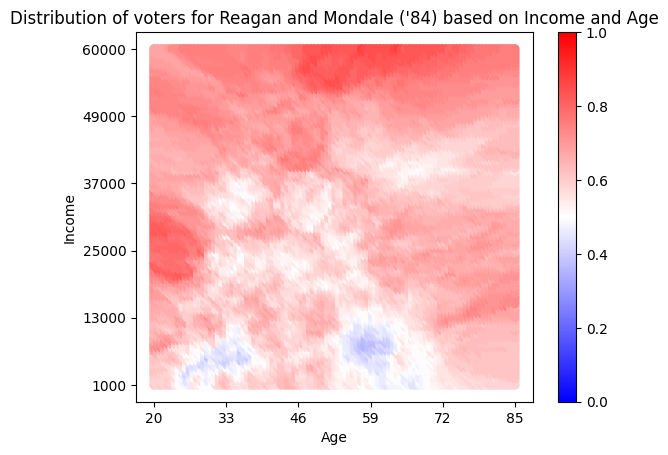

In [ ]:
train_dat2 = plot_regression2(X_train, y_train)

In [ ]:
# Determine k value
# Determine optimal k val for this data

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("K where SSE is minimized:", k_star)
print("SSE at " + str(k_star) + ':', SSE_min)

K where SSE is minimized: [65]
SSE at [65]: 145.58390532544377


Text(0, 0.5, 'SSE')

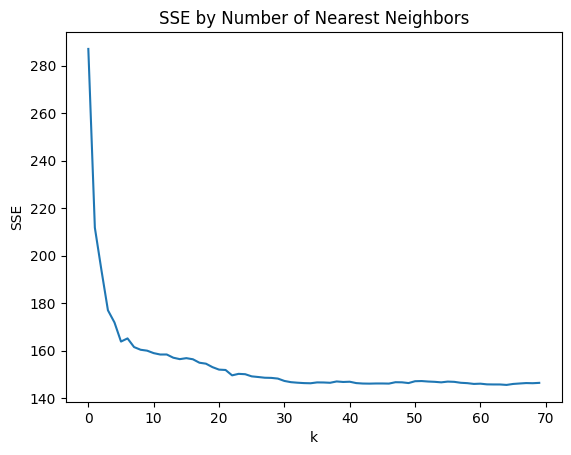

In [ ]:
plt.title("SSE by Number of Nearest Neighbors")
plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")

A similar method was implemented in order to create a comparison regression for 1986. In this case K nearest neighbor regression was once again implemented. A k value of 65 was determined through minimizing SSE in the range of 0,70. This worked to provide the visualization shown which works to avoid the overfitting problem while also showing meaningful trends in the data. While the methodologies are largely similar there are key differences that must be considered. First due to the strong skew of the data towards Reagan the coloring needed to be adjusted. The skew towards Reagan meant that the prediction coefficients were much closer to 1 than 0 which left the change from blue to read at approximately 0.6 rather than 0.5. In order to avoid misinterpretation a new technique was implemented to achieve the same result. The Matplotlib package allows for more versatility with regards to creation of color maps. A color dictionary was created in order to define a transition from red to blue at exactly .5. Then vmin and vmax were set to (0,1) anchoring the color map to the interval rather than data range. Finally a continuous colorbar is used for the legend in line with this method.

The results show a far different picture than that of the 1980 election. Just four years later the Republican domination that was just beginning was now in full effect. The main trends that were identified in 1980 was a clear delineation at income and strongest prediction coefficients at 50-60 years of age. These trends are almost completely gone by this point in time.

It is necessary to understand this figure in context with the landslide victory of Reagan over Mondale in 1984. Reagan won an unprecedented 525 electoral votes to Mondale’s 13 (https://www.britannica.com/event/United-States-presidential-election-of-1984). Thus, in context, it becomes more clear why these trends may have disappeared. The regression predicts only two areas of relative blue voting. This is for low income Americans from 25-35 and 55-65, and even with this being said the prediction coefficient is far from confident. These two spots could be the last sign of the previously identified income trend from earlier. While income no longer has the quasi-linear separation that it showed in 1980, the only democratic votes remain in their previous voting block suggesting that Reagan ate into this voting voting bloc leaving few left.

Furthermore, while Reagan’s landslide victory makes the plot nearly entirely red, the prediction coefficients also can tell about trends in the regression. There is an interesting white spot in the middle income, middle age in which the regression is less confident than other regions. Looking back to the 1980 election some insight can be gained. In 1980 this area was a democratic trending group. Thus in this region voters would have had to change their party of interest from 4 years prior. It is likely that not everyone in this range changed their party vote, thus leaving a split between loyal democrats and Reagan supporters giving the regression low confidence either way.

Overall we see a landslide victory for Reagan leading to red vote predictions for nearly every American. Those that did stand by the democratic party remained in their previous voting bloc of low income americans. Furthermore previous democratic regions were the least confidently predicted as some chose to leave the party and vote for Reagan while others remained, creating a split that the model found difficult to predict.

##Modeling by 'racseg' ('84 election)

As completed for the 1980 election, we also ran a model including the “raceseg” variable for the ‘84 election. This model followed the same conditions, with one dataframe depicting those who agreed that whites should have segregated neighborhoods, as well as those who disagree. An 80/20 train-test split a k value of 32 in order to minimize the SSE.

In [ ]:
# Clean data to only incorporate observations with 'racseg' values'
gss_dat84 = gss_dat84.loc[~gss_dat84['racseg'].isnull()]
gss_dat84['racseg'].unique()

# combine variations of same answer into agree and disagree (1-0)
gss_dat84['racseg'] = gss_dat84['racseg'].replace("agree slightly", 1).replace("agree strongly", 1).replace("disagree slightly", 0).replace("disagree strongly", 0)

agree_dat84 = gss_dat84.loc[gss_dat84['racseg'] == 1]
disagree_dat84 = gss_dat84.loc[gss_dat84['racseg'] == 0]

# each dataframe contains either only agree or disagree data
print(agree_dat84['racseg'].unique())
print(disagree_dat84['racseg'].unique())

[1]
[0]


<ipython-input-180-7bf6c9da76e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat84['racseg'] = gss_dat84['racseg'].replace("agree slightly", 1).replace("agree strongly", 1).replace("disagree slightly", 0).replace("disagree strongly", 0)


In [ ]:
pd.crosstab(gss_dat84['racseg'], gss_dat84['pres84'])

pres84,0,1
racseg,,
0,737,981
1,122,247


<Axes: xlabel='age', ylabel='income'>

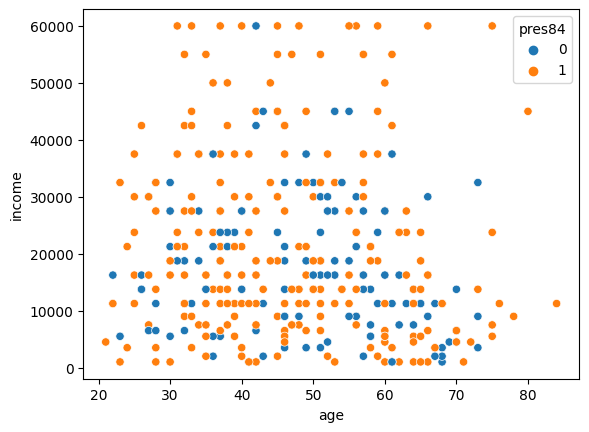

In [ ]:
# those who AGREE that "whites have a right to a segregated neighborhood"
sns.scatterplot(data=agree_dat84, x='age', y='income', hue='pres84')

<Axes: xlabel='age', ylabel='income'>

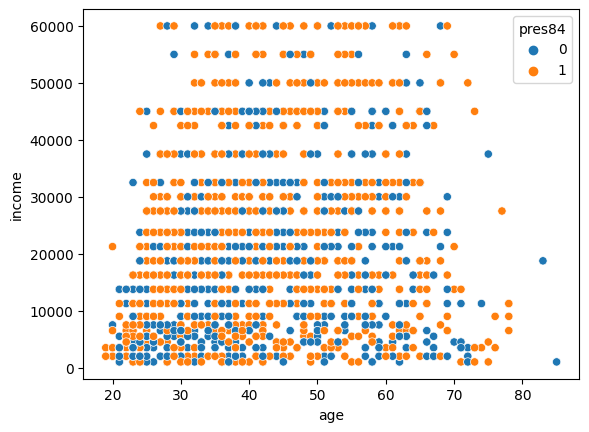

In [ ]:
# those who DISAGREE that "whites have a right to a segregated neighborhood"
sns.scatterplot(data=disagree_dat84, x='age', y='income', hue='pres84')

<Axes: xlabel='temp_age', ylabel='temp_income'>

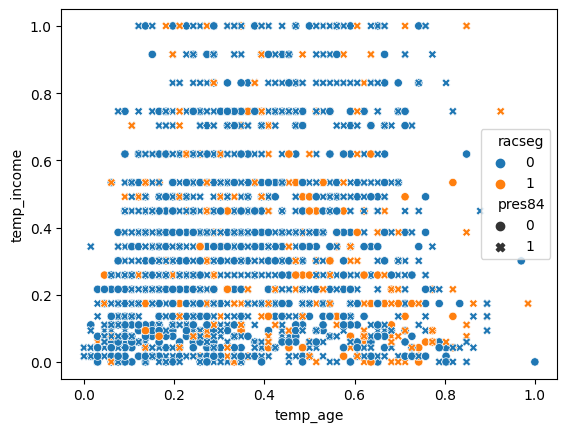

In [ ]:
temp = gss_dat84[['age']]
temp_age = temp.apply(maxmin)
temp = gss_dat84[['income']]
temp_income = temp.apply(maxmin)

gss_dat84['temp_age'] = temp_age
gss_dat84['temp_income'] = temp_income

sns.scatterplot(data=gss_dat84, x='temp_age', y='temp_income', hue='racseg', style='pres84')

In [ ]:
### kNN for those who AGREE ('racseg') ###
X = agree_dat84[['income', 'age']]
y = agree_dat84['pres84']

X = X.apply(maxmin)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=72)


model = kNNRegressor(n_neighbors=32) # from SSE vs. k graphed below
fitted_model = model.fit(X_train, y_train)

In [ ]:
# Run regression model
# Regression function to predict pres vote based on 'age' and 'income'
import matplotlib.colors
def plot_regression2():

  N_x = 100
  N_y = 100 # Coarseness of y variable
  total = N_x*N_y # Total number of points to plot

  grid_x = np.linspace(0,1,N_x) # Create a grid of x values
  grid_y = np.linspace(0,1,N_y) # Create a grid of y values

  xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
  X = xs.reshape(total) # Turns pairs into vectors
  Y = ys.reshape(total) # Turns pairs into vectors

  x_hat = pd.DataFrame({'income':X,'age':Y}) # Create a dataframe of points to plot
  y_hat = fitted_model.predict(x_hat) # Fit the model to the points
  x_hat['Predicted'] = y_hat # Add new variable to the dataframe
  # Red to blue palette to show traditional political colors
  cdict = {'red':  ((0.0, 0.0, 0.0),
                    (0.5, 1.0, 1.0),
                    (1.0, 1.0, 1.0)),

          'green': ((0,0,0),
                  (0.5,1,1),
                  (1,0,0)),

          'blue': ((0.0, 1.0, 1.0),
                    (0.5, 1.0, 1.0),
                    (1.0, 0.0, 0.0))
          }
  cmap = matplotlib.colors.LinearSegmentedColormap("", cdict)

  #plot
  plt.scatter(x=x_hat["age"],y=x_hat["income"],c=x_hat["Predicted"],cmap=cmap,vmin=0,vmax=1)
  plt.title("Distribution of Voters for Reagan and Mondale ('84) based on Income and Age for those who Agree that Whites have a right to segregated neighborhoods")
  plt.ylabel('Income')
  plt.xlabel('Age')
  plt.colorbar()
  plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [20, 33, 46, 59, 72, 85])
  plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [1000, 13000, 25000, 37000, 49000, 60000])
  plt.show()

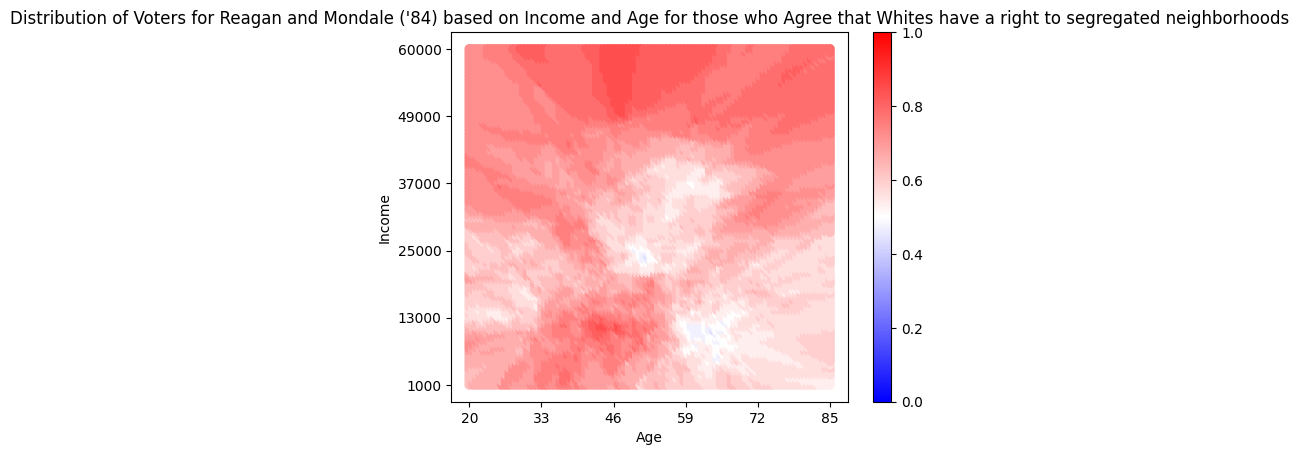

In [ ]:
plot_regression2()

**Figure 5 - Distribution of Voters for those that agree that Whites have a right to segregated neighborhoods ('84 election)**



In [ ]:
# Determine k value
# Determine optimal k val for this data

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("K where SSE is minimized:", k_star)
print("SSE at " + str(k_star) + ':', SSE_min)

K where SSE is minimized: [32]
SSE at [32]: 14.8662109375


Text(0, 0.5, 'SSE')

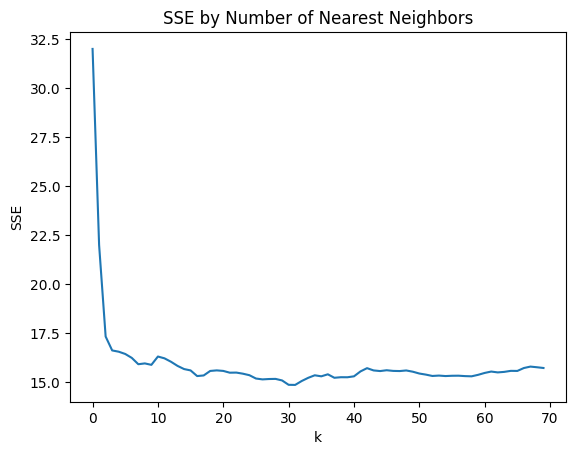

In [ ]:
plt.title("SSE by Number of Nearest Neighbors")
plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")

In [ ]:
### kNN for those who DISAGREE ('racseg') ###
X = disagree_dat84[['income', 'age']]
y = disagree_dat84['pres84']

X = X.apply(maxmin)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=72)


model = kNNRegressor(n_neighbors=59)
fitted_model = model.fit(X_train, y_train)

In [ ]:
# Run regression model
# Regression function to predict pres vote based on 'age' and 'income'
import matplotlib.colors
def plot_regression2():

  N_x = 100
  N_y = 100 # Coarseness of y variable
  total = N_x*N_y # Total number of points to plot

  grid_x = np.linspace(0,1,N_x) # Create a grid of x values
  grid_y = np.linspace(0,1,N_y) # Create a grid of y values

  xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
  X = xs.reshape(total) # Turns pairs into vectors
  Y = ys.reshape(total) # Turns pairs into vectors

  x_hat = pd.DataFrame({'income':X,'age':Y}) # Create a dataframe of points to plot
  y_hat = fitted_model.predict(x_hat) # Fit the model to the points
  x_hat['Predicted'] = y_hat # Add new variable to the dataframe
  # Red to blue palette to show traditional political colors
  cdict = {'red':  ((0.0, 0.0, 0.0),
                    (0.5, 1.0, 1.0),
                    (1.0, 1.0, 1.0)),

          'green': ((0,0,0),
                  (0.5,1,1),
                  (1,0,0)),

          'blue': ((0.0, 1.0, 1.0),
                    (0.5, 1.0, 1.0),
                    (1.0, 0.0, 0.0))
          }
  cmap = matplotlib.colors.LinearSegmentedColormap("", cdict)

  #plot
  plt.scatter(x=x_hat["age"],y=x_hat["income"],c=x_hat["Predicted"],cmap=cmap,vmin=0,vmax=1)
  plt.title("Distribution of Voters for Reagan and Mondale ('84) based on Income and Age for those who Disagree that Whites have a right to segregated neighborhoods")
  plt.ylabel('Income')
  plt.xlabel('Age')
  plt.colorbar()
  plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [20, 33, 46, 59, 72, 85])
  plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [1000, 13000, 25000, 37000, 49000, 60000])
  plt.show()

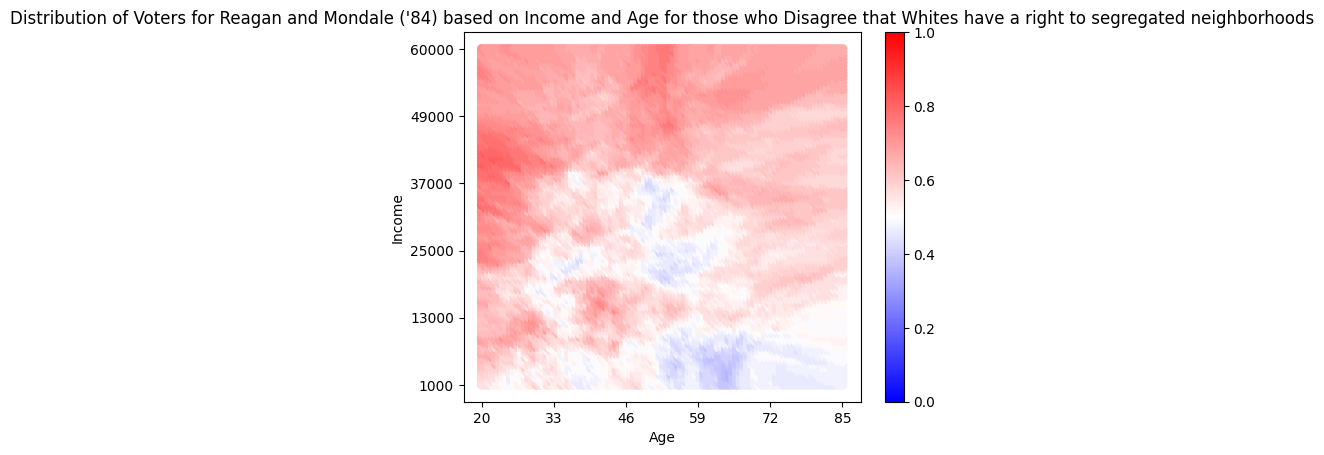

In [ ]:
plot_regression2()

**Figure 6 - Distribution of of Voters for those that disagree that Whites have a right to segregated neighborhoods ('84 election)**

In [ ]:
# Determine k value
# Determine optimal k val for this data

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("K where SSE is minimized:", k_star)
print("SSE at " + str(k_star) + ':', SSE_min)

K where SSE is minimized: [59]
SSE at [59]: 83.43349612180407


Text(0, 0.5, 'SSE')

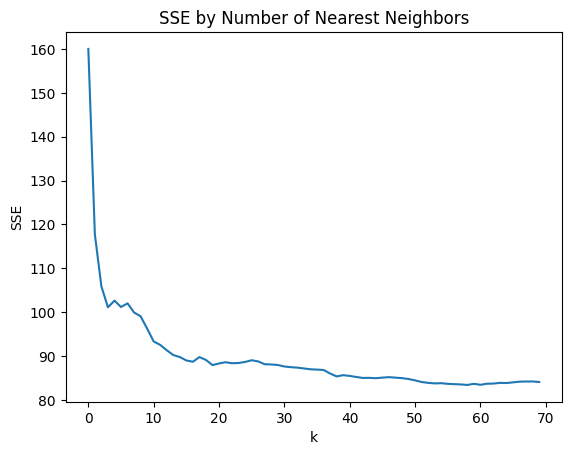

In [ ]:
plt.title("SSE by Number of Nearest Neighbors")
plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")

In comparison to those who agree from the ‘80 election (figure 2), the results from figure 5 are significant. As mentioned previously, a trend viewed is that the Republican Party (those who vote for Reagan) tend to be more in favor of segregated neighborhoods. One difference as compared to the modeled data from ‘80 with the “raceseg” variable are the individuals within the lower income range (<13,000) who agreed voting for the Republican Party instead of the Democratic Party. The coefficients show higher confidence in both figures 2 and 5. This clearly demonstrates a favoring for Reagan, and his more conservative values he upheld. The prediction coefficients were most confident for middle-aged individuals (40 - 50) with a higher income > 50,000. Overall, as compared to figure 2, those with incomes above 40,000 and voted for Reagan tended to agree with the idea of segregated neighborhoods, suggesting a trend of high income, Republican voters upholding more racist opinions. Figure 5 does depict some light spots of blue coloring, but they are weakly confident (.3). One may suggest that the absence of blue in this model as compared to figure 2 suggests a polarization in the opinion of race between the two parties. This cannot be a clear conclusion due to Reagan’s landslide victory, even with popular votes- he surpassed Mondale by about 17 million (https://www.britannica.com/event/United-States-presidential-election-of-1984).

When we compare the addition of the opinion of segregated neighborhoods as compared to figure 4, there are key differences. It is shown that there are stronger predictor coefficients for those who agree in the age range of 25 to 55 years old under 20,000, as compared to white to a light red in figure 4. (Have to figure out what this suggests). Additionally, all of these are a darker red which shows favoring Reagan. Figure 4 also depicts how there was high confidence of younger voters between the ages of 20 - 30 with a middle income favoring Reagan. The coefficient becomes much weaker in figure 5, although it is still red, suggesting that not many individuals in that subgroup could clearly have said they agree to the idea of segregated white neighborhoods.

For those who disagree with whites having a right to a segregated neighborhood, the prediction coefficients seem a bit weaker as compared to those who agreed. However, there is still a clear trend that the higher income voters. The strongest prediction coefficients are younger, upper-middle class individuals who voted for Reagan. The prediction coefficients are around .8. This is an interesting finding that could support that younger voters are less likely to hold racist opinions. As compared to figure 3, the prediction variables for Reagan are much weather, when there was high confidence younger voters for Reagan that stated “disagree” to the question. Additionally, there is some blue on the graph with weak predictions of lower income, older individuals older than 50 voted for Mondale and said no to the question

#Conclusion

Our team examined the trends and changes in voting preferences based on individuals age and income over the course of Reagan’s two terms. Additionally, we sought out to see if there were any changes in the racial biases that individuals had when prompted whether whites should have their own separate neighborhood. Our findings from our prediction models were significant. In terms of age and income, the 1980 model saw stronger prediction coefficients for those in the higher income bracket, as well as the lower ones. The higher income bracket tended to have more votes for Reagan, while those in the lower brackets voted for Carter. This trend was swept away due to Reagan’s landslide victory, one of the largest ones in history. Those that were predicted to vote Democratic did remain in the lower income brackets, however, which suggests a trend. In terms of age, one trend seen from both prediction models is that lower income individuals from ages 20-33 who were middle class displayed stronger prediction variables towards votes for Reagan. This could be due to Reagan’s economic policy, which included tax cuts and deregulation which they could have believed would lead to economic prosperity. Additionally, they could’ve seen benefit from tax cuts, which led to them to continue voting for Reagan.

Future research could be conducted on more elections, before and after 1980 --1984. This research would illuminate broader socioeconomic/voting trends, and contextualize our prediction models. Examining other variables including voters' religous prefrences and education levels would also be interesting. Though it was outside the scope of this project, other data scientists could use the GSS data to predict voting preferences in the 2024 election. These data scientists would need to include more variables and more elections to increase the predictive accuracy of their model.

While examining the “raceseg” variable, there were plenty of interesting results when placed into the prediction model with income and age.